# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('EMG_1_Subject_1.xlsx')
raw_data.sample(5)

,Emg1
156226,0.2100
444715,0.6714
399391,0.0781
88926,0.0024
422803,0.0024


In [3]:
raw_data.shape

(471483, 1)

In [4]:
raw_data.columns

Index(['Emg1'], dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Emg1    471483 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


In [6]:
raw_data.describe(include='all')

,Emg1
count,471483.000000
mean,0.129657
std,0.286859
min,0.002400
25%,0.002400
50%,0.017100
75%,0.114700
max,4.665500


# AutoEncoder

# Scale data

In [7]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import load_model

In [14]:
dataset = raw_data


scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [15]:
train_size = int(len(dataset) * 0.99)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
n_inputs = raw_data.shape[1]

# AutoEncoder Architecture

In [18]:
# define encoder
visible = Input(shape=(n_inputs,))

### Encoder Layer

In [19]:
# encoder level 1
e = Dense(n_inputs*2, activation = 'relu')(visible)
e = BatchNormalization()(e)

### Bottleneck Layer

In [20]:
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

### Decoder Layer

In [21]:
# decoder level 1
d = Dense(n_inputs*2, activation = 'relu')(bottleneck)
d = BatchNormalization()(d)

In [22]:
# output layer
output = Dense(n_inputs, activation='softmax')(d)

In [23]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

# Model Compilation

In [24]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

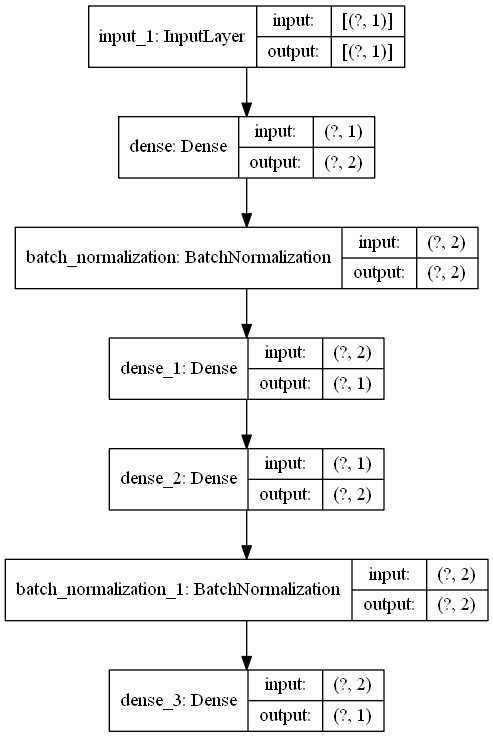

In [25]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [27]:
# fit the autoencoder model to reconstruct input
history = model.fit(train, train, epochs=20, batch_size=64,validation_data=(test,test))

Epoch 1/20
7294/7294 [==============================] - 10s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 2/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 3/20
7294/7294 [==============================] - 10s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 4/20
7294/7294 [==============================] - 10s 1ms/step - loss: 0.9503 - val_loss: 0.9166loss: 0.950 - ETA: 2s - lo - ETA: 0s - 
Epoch 5/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 6/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 7/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 8/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 9/20
7294/7294 [==============================] - 9s 1ms/step - loss: 0.9503 - val_loss: 0.9166
Epoch 10/20
7294/7294 [=================

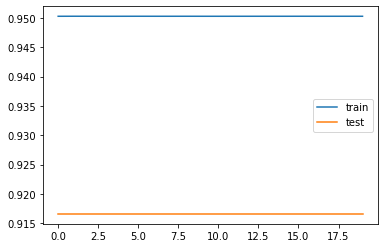

In [28]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()